In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# covid19.core

A simple library visualizing the data from[Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19).

In [ ]:
#hide
#default_exp core
from nbdev.showdoc import *

In [ ]:
#export
CONFIRMED_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
DEATHS_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
RECOVERED_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [ ]:
#export
import pandas as pd
confirmed_df = pd.read_csv(CONFIRMED_URI, skipinitialspace=True).fillna('')
deaths_df = pd.read_csv(DEATHS_URI, skipinitialspace=True).fillna('')
recovered_df = pd.read_csv(RECOVERED_URI, skipinitialspace=True).fillna('')

Experiments in using the pandas API to slice and dice the data from the dataset.

In [ ]:
START_DATE = '3/7/20'
STATE = 'Washington'
COUNTRY = 'US'

In [ ]:
df = confirmed_df.loc[(confirmed_df['Province/State']==STATE) & (confirmed_df['Country/Region']==COUNTRY),START_DATE:].T
df.index.name = 'Date'
df.reset_index(inplace=True)
df.columns = ['Date', 'Confirmed Cases']
df

,Date,Confirmed Cases
0,3/7/20,0
1,3/8/20,0
2,3/9/20,0
3,3/10/20,267
4,3/11/20,366
5,3/12/20,442
6,3/13/20,568
7,3/14/20,572
8,3/15/20,643
9,3/16/20,904


In [ ]:
ddf = deaths_df.loc[(deaths_df['Province/State']==STATE) & (deaths_df['Country/Region']==COUNTRY),START_DATE:].T
ddf.index.name = 'Date'
ddf.reset_index(inplace=True)
ddf.columns = ['Date', 'Deaths']
ddf

,Date,Deaths
0,3/7/20,0
1,3/8/20,0
2,3/9/20,0
3,3/10/20,23
4,3/11/20,29
5,3/12/20,31
6,3/13/20,37
7,3/14/20,37
8,3/15/20,40
9,3/16/20,48


In [ ]:
rdf = recovered_df.loc[(recovered_df['Province/State']==STATE) & (recovered_df['Country/Region']==COUNTRY),START_DATE:].T
rdf.index.name = 'Date'
rdf.reset_index(inplace=True)
rdf.columns = ['Date', 'Recovered']
rdf

,Date,Recovered
0,3/7/20,0
1,3/8/20,0
2,3/9/20,0
3,3/10/20,1
4,3/11/20,1
5,3/12/20,1
6,3/13/20,1
7,3/14/20,1
8,3/15/20,1
9,3/16/20,1


Copy columns between dataframes to generate a single dataframe that contains all the data that we want to copy.

In [ ]:
df['Deaths']=ddf['Deaths']
df['Recovered']=rdf['Recovered']
df

,Date,Confirmed Cases,Deaths,Recovered
0,3/7/20,0,0,0
1,3/8/20,0,0,0
2,3/9/20,0,0,0
3,3/10/20,267,23,1
4,3/11/20,366,29,1
5,3/12/20,442,31,1
6,3/13/20,568,37,1
7,3/14/20,572,37,1
8,3/15/20,643,40,1
9,3/16/20,904,48,1


## Examining the data in more detail

Looking at the dataset to see if we can identify interesting trends. In particular, we need to know when the number of rows in the dataset changes, as it indicates that new data is being added, e.g., additional states in the US are now reporting.

In [ ]:
confirmed_df['Country/Region'].drop_duplicates()

0         Thailand
1            Japan
2        Singapore
3            Nepal
4         Malaysia
          ...     
482       Dominica
483        Grenada
484     Mozambique
485          Syria
486    Timor-Leste
Name: Country/Region, Length: 171, dtype: object

Number of reporting areas in the United States ... this will be interesting

In [ ]:
confirmed_df.loc[confirmed_df['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,568,572,643,904,1076,1014,1376,1524,1793,1996
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,421,525,732,967,1706,2495,5365,8310,11710,15793
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,282,340,426,557,698,751,952,1177,1364,1642
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,123,138,164,197,218,218,328,413,525,646
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,47,47,47,47,49,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,5,6,12,29,39,46,78,83,131,138
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,3,5,5,5,5,5,14,21,23
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,3,3,3,5,12,14,15,27


OK, there are 247 rows. There aren't 247 states. So let's first start by downloading a list of states

In [ ]:
states_df = pd.read_csv("https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv")
states_df.head(5)

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Here we see 50 states plus DC

In [ ]:
pd.merge(states_df, confirmed_df, how='left', right_on=["Province/State"], left_on=["State"])

,State,Abbreviation,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Alabama,AL,Alabama,US,32.3182,-86.9023,0,0,0,0,...,5,6,12,29,39,46,78,83,131,138
1,Alaska,AK,Alaska,US,61.3707,-152.4044,0,0,0,0,...,1,1,1,1,3,6,9,12,15,21
2,Arizona,AZ,Arizona,US,33.7298,-111.4312,0,0,0,0,...,9,12,13,18,20,27,45,78,118,152
3,Arkansas,AR,Arkansas,US,34.9697,-92.3731,0,0,0,0,...,6,12,16,22,22,33,62,96,122,165
4,California,CA,California,US,36.1162,-119.6816,0,0,0,0,...,282,340,426,557,698,751,952,1177,1364,1642
5,Colorado,CO,Colorado,US,39.0598,-105.3111,0,0,0,0,...,49,101,131,160,160,184,277,363,390,476
6,Connecticut,CT,Connecticut,US,41.5978,-72.7554,0,0,0,0,...,11,22,24,30,68,68,159,194,194,223
7,Delaware,DE,Delaware,US,39.3185,-75.5071,0,0,0,0,...,4,6,7,8,16,19,30,38,45,47
8,District of Columbia,DC,District of Columbia,US,38.8974,-77.0268,0,0,0,0,...,10,10,16,22,22,31,40,71,77,102
9,Florida,FL,Florida,US,27.7663,-81.6868,0,0,0,0,...,50,76,115,155,216,314,417,563,659,830


## Plot the data using the plotly API

While plotly is good for generating interactive plots, it isn't good for generating a dashboard that will be hosted as pure HTML on Github.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

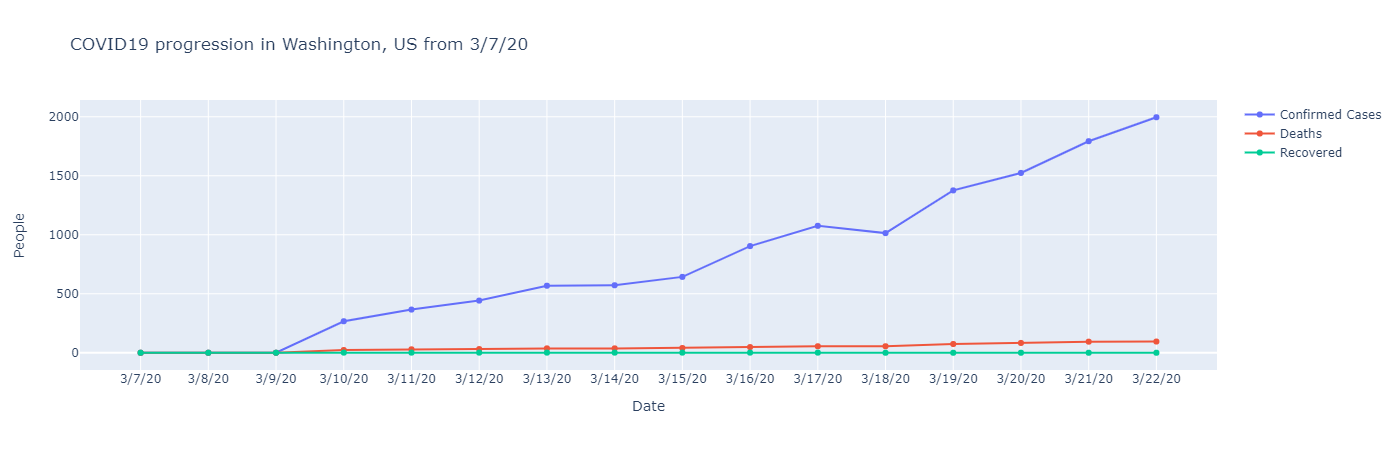

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'],y=df['Confirmed Cases'], mode='lines+markers', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['Deaths'], mode='lines+markers', name='Deaths'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['Recovered'], mode='lines+markers', name='Recovered'))
fig.update_layout(
    title=f"COVID19 progression in {STATE}, {COUNTRY} from {START_DATE}",
    xaxis_title="Date",
    yaxis_title="People"
)
fig.show()

Putting it all together into a single `plot` function that can be used to do everything. Note this won't go into the library - it's only really useful to summarize this section.

In [ ]:
def plot(state, country, start_date):
    global confirmed_df, deaths_df, recovered_df

    df = confirmed_df.loc[(confirmed_df['Province/State']==state) & (confirmed_df['Country/Region']==country),start_date:].T
    df.index.name = 'Date'
    df.reset_index(inplace=True)
    df.columns = ['Date', 'Confirmed Cases']

    ddf = deaths_df.loc[(deaths_df['Province/State']==state) & (deaths_df['Country/Region']==country),start_date:].T
    ddf.index.name = 'Date'
    ddf.reset_index(inplace=True)
    ddf.columns = ['Date', 'Deaths']
    
    rdf = recovered_df.loc[(recovered_df['Province/State']==state) & (recovered_df['Country/Region']==country),start_date:].T
    rdf.index.name = 'Date'
    rdf.reset_index(inplace=True)
    rdf.columns = ['Date', 'Recovered']

    df['Deaths']=ddf['Deaths']
    df['Recovered']=rdf['Recovered']

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Confirmed Cases'], mode='lines+markers', name='Confirmed Cases'))
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Deaths'], mode='lines+markers', name='Deaths'))
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Recovered'], mode='lines+markers', name='Recovered'))
    fig.update_layout(
        title=f"COVID19 progression in {state}, {country} from {start_date}",
        xaxis_title="Date",
        yaxis_title="People"
    )
    fig.show()


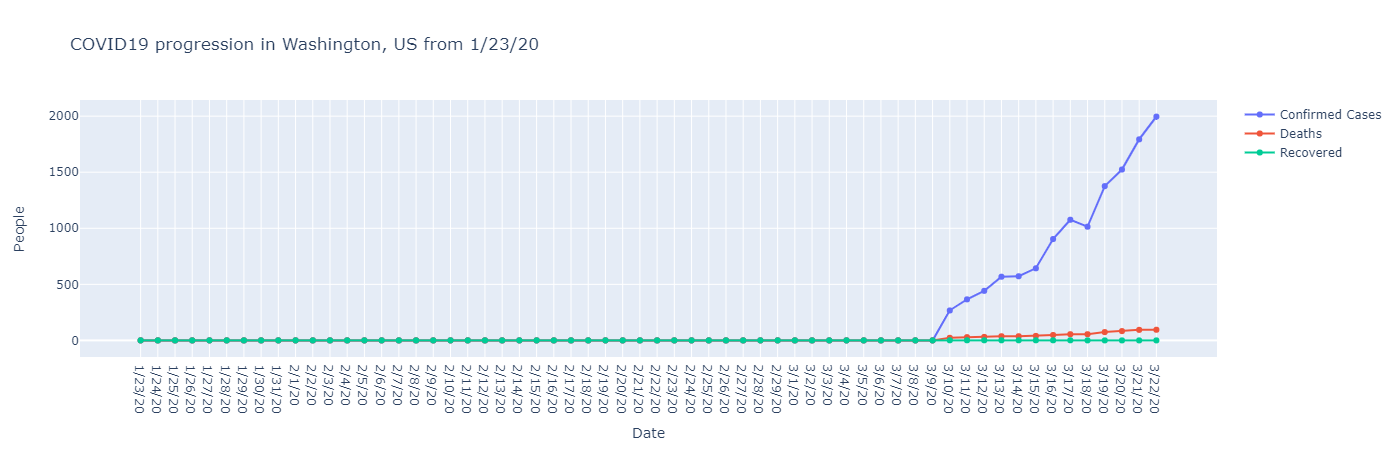

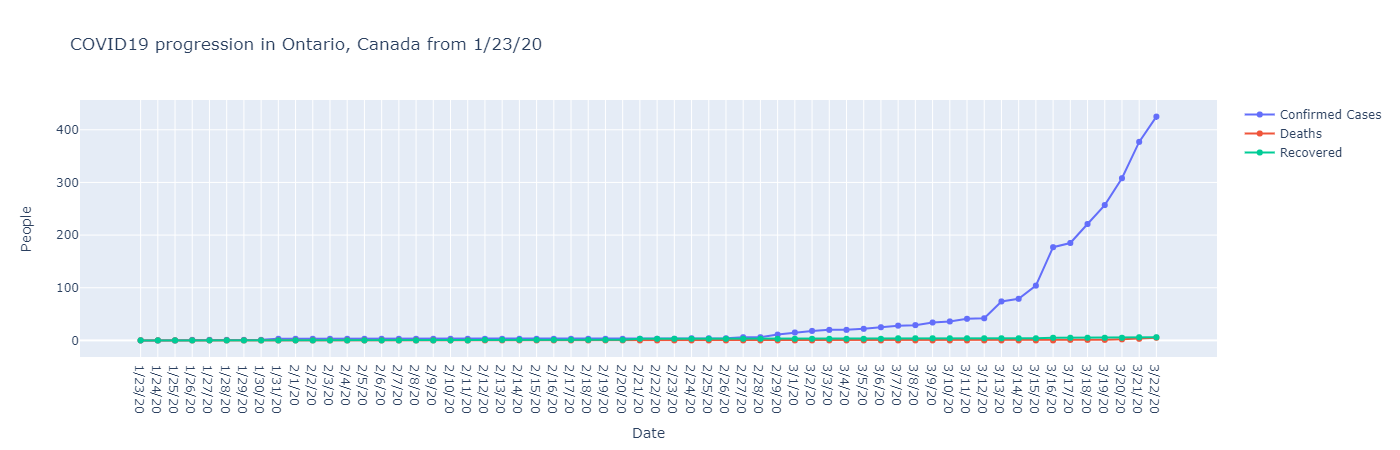

In [ ]:
plot('Washington', 'US', '1/23/20')
plot('Ontario', 'Canada', '1/23/20')

## Plot the data using bokeh

While these experiments are being kept here for posterity, `bokeh` is also not usable on Github because it wants to render using dynamic HTML.


In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [ ]:
p = figure(x_axis_type="datetime", title="Washington, US COVID19 Time Series")
p.line(pd.to_datetime(df['Date']), df["Confirmed Cases"], color="blue", legend_label="Confirmed Cases")
p.line(pd.to_datetime(df['Date']), df["Deaths"], color="red", legend_label="Deaths")
p.line(pd.to_datetime(df['Date']), df["Recovered"], color="green", legend_label="Recovered")
p.legend.location = "top_left"
show(p)

Let's create a new `get_data` function that lets me aggregate using wildcards as well against the raw pandas data. For example, if you want the cases for Washington, USA you would specify two parameters. If you want the cases for USA, you would only specify USA, and it will return to you a `pandas` dataframe with the contents.

In [ ]:
#export 
def get_data(state, country, start_date):
    global confirmed_df, deaths_df, recovered_df
    
    if start_date == "":
        start_date = "1/23/20"
        
    def filter(df, state, country, start_date):
        if state == "":
            # Select rows by country and then sum over all rows that are returned
            tdf = df.loc[df["Country/Region"] == country]
            return tdf.groupby("Country/Region").sum().loc[:, start_date:].T
        else:
            return df.loc[(df["Province/State"] == state) & (df["Country/Region"] == country), start_date:].T
        
    def transform_labels(df, column_name):
        if df.empty:
            return df
        df.index.name = 'Date'
        df.reset_index(inplace = True)
        df.columns = ['Date', column_name]
        return df

    df = transform_labels(filter(confirmed_df, state, country, start_date), 'Confirmed Cases')
    ddf = transform_labels(filter(deaths_df, state, country, start_date), 'Deaths')
    rdf = transform_labels(filter(recovered_df, state, country, start_date), 'Recovered')
    
    if df.empty or ddf.empty or rdf.empty:
        return df
    
    df['Deaths'] = ddf['Deaths']
    df['Recovered'] = rdf['Recovered']
    df['Date'] = pd.to_datetime(df['Date'])
    return df

Next, let's create a separate `plot_bokeh` function that will generate a bokeh plot from the appropriate `pandas` dataframe:

In [ ]:
def plot_bokeh(df, state, country, start_date):
    if state == "":
        region = f"{country}"
    else:
        region = f"{state}, {country}"
    
    p = figure(x_axis_type="datetime", title=f"{region} COVID19 Time Series from {start_date}")
    p.line(pd.to_datetime(df['Date']), df["Confirmed Cases"], color="blue", legend_label="Confirmed Cases")
    p.line(pd.to_datetime(df['Date']), df["Deaths"], color="red", legend_label="Deaths")
    p.line(pd.to_datetime(df['Date']), df["Recovered"], color="green", legend_label="Recovered")
    p.legend.location = "top_left"
    return p

In [ ]:
p = plot_bokeh(get_data("Washington", "US", ""), "Washington", "US", "")
show(p)

## Plotting a dashboard using bokeh

Next, let's define a simple dataframe that contains a list of states that I want to plot.

In [ ]:
states = ['Washington', 'Oregon', 'Florida', 'New York', 'California', 'Texas', 'Massachusetts', 'Colorado']
countries = ['US'] * len(states)
start_dates = ['3/7/20'] * len(states)
dashboard_df = pd.DataFrame({'state': states, 'country': countries, 'start_date': start_dates})
dashboard_df

,state,country,start_date
0,Washington,US,3/7/20
1,Oregon,US,3/7/20
2,Florida,US,3/7/20
3,New York,US,3/7/20
4,California,US,3/7/20
5,Texas,US,3/7/20
6,Massachusetts,US,3/7/20
7,Colorado,US,3/7/20


Next, let's define a function that will use `bokeh` to generate a grid of plots. I rather like the aesthetic of the default `bokeh` plots, but once again, I really need these plots to be usable from a static HTML page hosted on Github.

In [ ]:
def generate_plots(regions):
    plots = []
    for index, row in regions.iterrows():
        state = row['state']
        country = row['country']
        start_date = row['start_date']
        df = get_data(state, country, start_date)
        if not df.empty:
            plots.append(plot_bokeh(df, state, country, start_date))
    return plots

In [ ]:
from bokeh.layouts import gridplot

plots = generate_plots(dashboard_df)
grid = gridplot(plots, ncols=4, plot_width=400, plot_height=400)
show(grid)

## Plot the data using seaborn and matplotlib

Let's use Seaborn to style `matplotlib` plots better, as it will generate and insert PNG files into the generated HTML which makes it suitable for Github publishing.

We'll start by importing `seaborn` and `matplotlib` libraries and setting some global styling.

In [ ]:
#export
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

Seaborn prefers to have a single column for the variable and the value. This is accomplished through the pandas [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function that will convert our columns into the melted format. This is what the data looks like in our dataframe before we melt it:

In [ ]:
df = get_data("New York", "US", "3/7/20")
df

,Date,Confirmed Cases,Deaths,Recovered
0,2020-03-07,0,0,0
1,2020-03-08,0,0,0
2,2020-03-09,0,0,0
3,2020-03-10,173,0,0
4,2020-03-11,220,0,0
5,2020-03-12,328,0,0
6,2020-03-13,421,0,0
7,2020-03-14,525,2,0
8,2020-03-15,732,3,0
9,2020-03-16,967,10,0


In [ ]:
pd.melt(df, ['Date'])

,Date,variable,value
0,2020-03-07,Confirmed Cases,0
1,2020-03-08,Confirmed Cases,0
2,2020-03-09,Confirmed Cases,0
3,2020-03-10,Confirmed Cases,173
4,2020-03-11,Confirmed Cases,220
5,2020-03-12,Confirmed Cases,328
6,2020-03-13,Confirmed Cases,421
7,2020-03-14,Confirmed Cases,525
8,2020-03-15,Confirmed Cases,732
9,2020-03-16,Confirmed Cases,967


Define `plot_seaborn` which will render a seaborn plot within a figure of dimensions rows x columns at the specified index.

In [ ]:
#export
import datetime

def plot_seaborn(df, state, country, start_date, figure, rows, columns, index):
    if state == "":
        region = f"{country}"
    else:
        region = f"{state}, {country}"

    figure.add_subplot(rows, columns, index)
    p = sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(df, ['Date']))
    p.set_title(f"{region} from {start_date}", loc='left', fontdict={'fontweight': 'bold'})
    
    # Remove "variable" from the legend box
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])

    # Format the x axis and y axis values
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    ax.set_xticklabels([datetime.datetime.fromordinal(int(tm)).strftime('%m-%d') for tm in xticks], rotation=45)
    ax.set_yticklabels([f"{val:0.0f}" for val in yticks])
    
    # Set the axis labels
    ax.set_ylabel("People")
    ax.set_xlabel("")
    return p

Test plotting the data for the New York cases in a figure of size 1x1

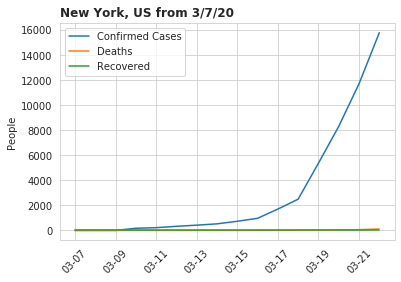

In [ ]:
df = get_data('New York', 'US', '3/7/20')
plot_seaborn(df, 'New York', 'US', '3/7/20', plt.figure(), 1, 1, 1)
plt.show()

Define a function that will generate plots based on a dataframe that contains regions to plot (see above) within a grid that is `columns` wide. The number of rows will be computed dynamically.

In [ ]:
#export
import math
def generate_plots(regions, columns):
    # Calculate rows and columns - we want columns across per row
    count = len(regions)
    rows = math.ceil(count / columns)
    figure = plt.figure(figsize=(columns*6,rows*6))
    figure.subplots_adjust(hspace=0.5)
    n = 1
    for index, row in regions.iterrows():
        state = row['state']
        country = row['country']
        start_date = row['start_date']
        df = get_data(state, country, start_date)
        if not df.empty:
            plot_seaborn(df, state, country, start_date, figure, rows, columns, n)
            n += 1
    return figure

Generate a dashboard that contains the data for 8 states in a 4x2 grid

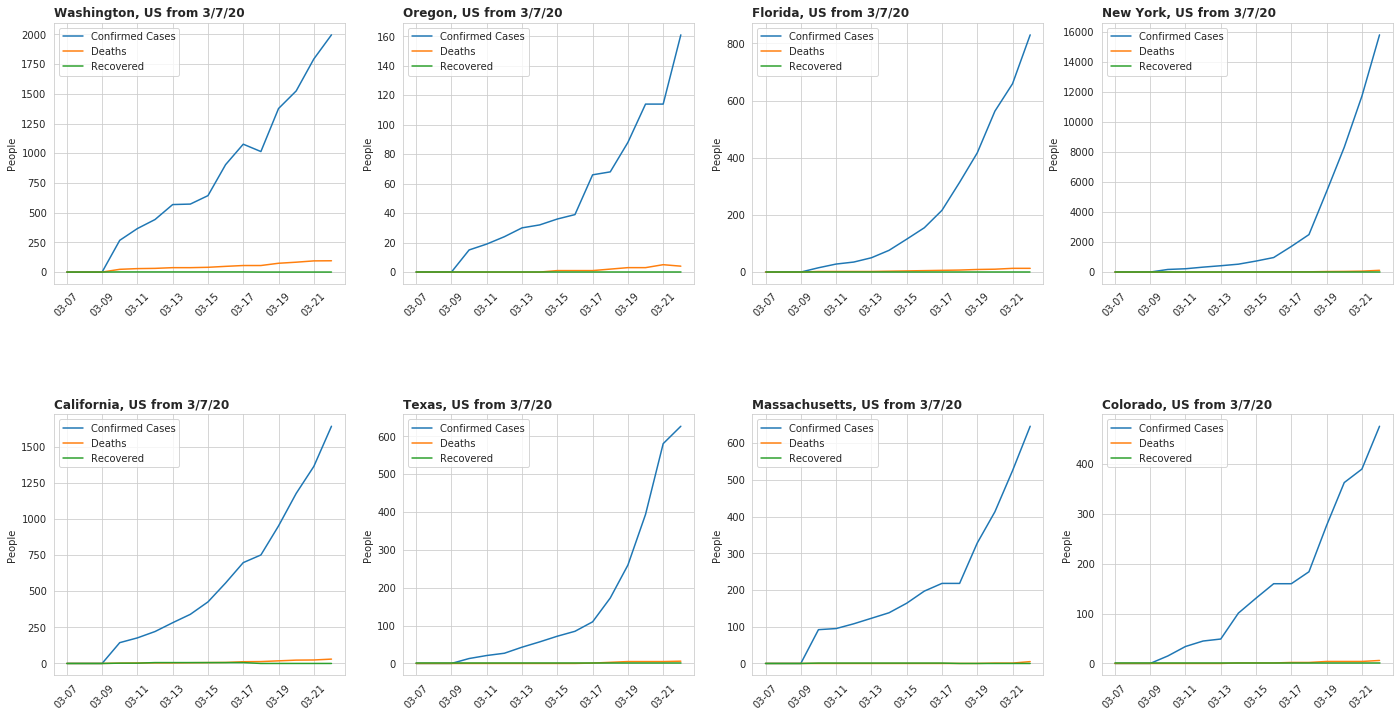

In [ ]:
generate_plots(dashboard_df, 4)
plt.show()

## Plotting and overlaying a bar chart that shows the first derivative on the plot

Here's a [reference](https://twitter.com/EricTopol/status/1241955275902316547/photo/1): 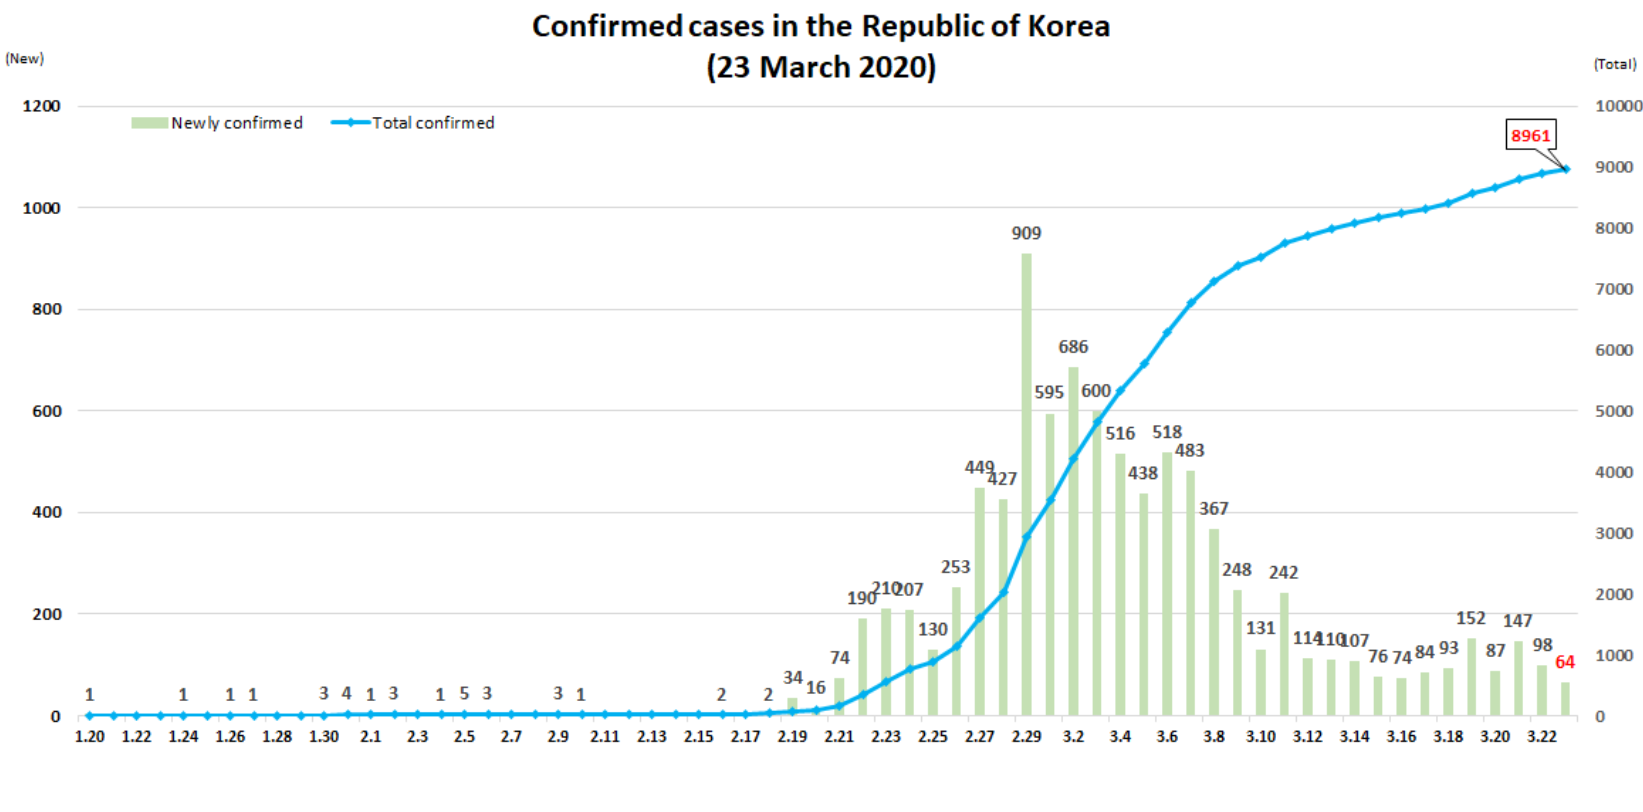

In [ ]:
df = get_data('New York', 'US', '3/7/20')
state = "New York"
country = "US"
start_date = "3/7/20"
columns = 6
rows = 6
figure = plt.figure(figsize=(columns*6,rows*6))
index = 1
df

,Date,Confirmed Cases,Deaths,Recovered
0,2020-03-07,0,0,0
1,2020-03-08,0,0,0
2,2020-03-09,0,0,0
3,2020-03-10,173,0,0
4,2020-03-11,220,0,0
5,2020-03-12,328,0,0
6,2020-03-13,421,0,0
7,2020-03-14,525,2,0
8,2020-03-15,732,3,0
9,2020-03-16,967,10,0


<Figure size 2592x2592 with 0 Axes>

Compute first derivative in the dataframe

In [ ]:
derivative_df = df.diff()
derivative_df

,Date,Confirmed Cases,Deaths,Recovered
0,NaT,NaN,NaN,NaN
1,1 days,0.0,0.0,0.0
2,1 days,0.0,0.0,0.0
3,1 days,173.0,0.0,0.0
4,1 days,47.0,0.0,0.0
5,1 days,108.0,0.0,0.0
6,1 days,93.0,0.0,0.0
7,1 days,104.0,2.0,0.0
8,1 days,207.0,1.0,0.0
9,1 days,235.0,7.0,0.0


In [ ]:
derivative_df['Date'] = df['Date']
derivative_df

,Date,Confirmed Cases,Deaths,Recovered
0,2020-03-07,NaN,NaN,NaN
1,2020-03-08,0.0,0.0,0.0
2,2020-03-09,0.0,0.0,0.0
3,2020-03-10,173.0,0.0,0.0
4,2020-03-11,47.0,0.0,0.0
5,2020-03-12,108.0,0.0,0.0
6,2020-03-13,93.0,0.0,0.0
7,2020-03-14,104.0,2.0,0.0
8,2020-03-15,207.0,1.0,0.0
9,2020-03-16,235.0,7.0,0.0


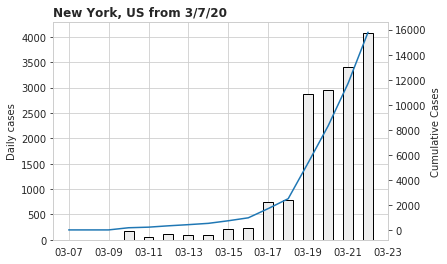

In [ ]:
plt.bar(derivative_df[1:]['Date'], derivative_df[1:]['Confirmed Cases'], edgecolor='black', color='#eeeeee', width=0.5)
plt.ylabel('Daily cases')

ax = plt.twinx()
ax.plot(df['Date'], df['Confirmed Cases'])
ax.set_ylabel('Cumulative Cases')
ax.grid(None)

plt.title(f"{region} from {start_date}", loc="left", fontdict={'fontweight': 'bold'})
xticks = ax.get_xticks()
ax.set_xticklabels([datetime.datetime.fromordinal(int(tm)).strftime('%m-%d') for tm in xticks])
plt.show()

Now let's put it all together in a function that will compute the derivative and plot the overlaid graph. I also think we can simplify this to not use any seaborn (which is overkill for this kind of visualization)

In [ ]:
#export
import datetime

def plot_matplotlib(df, state, country, start_date, figure, rows, columns, index):
    if state == "":
        region = f"{country}"
    else:
        region = f"{state}, {country}"

    derivative_df = df.diff()
    derivative_df['Date'] = df['Date']    
    
    figure.add_subplot(rows, columns, index)
    plt.bar(derivative_df[1:]['Date'], derivative_df[1:]['Confirmed Cases'], edgecolor='black', color='#eeeeee', width=0.5)
    plt.ylabel('Daily cases')

    ax = plt.twinx()
    ax.plot(df['Date'], df['Confirmed Cases'])
    ax.set_ylabel('Cumulative Cases')
    ax.grid(None)

    plt.title(f"{region} from {start_date}", loc="left", fontdict={'fontweight': 'bold'})
    xticks = ax.get_xticks()
    ax.set_xticklabels([datetime.datetime.fromordinal(int(tm)).strftime('%m-%d') for tm in xticks])

Now test it out for a single plot

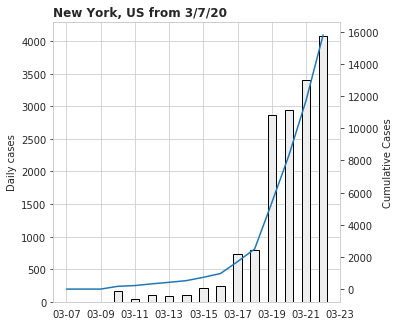

In [ ]:
df = get_data('New York', 'US', '3/7/20')
figure = plt.figure(figsize=(columns*6,rows*6))
plot_matplotlib(df, 'New York', 'US', '3/7/20', figure, 6, 6, 1)

Now define the function for multiple plots

In [ ]:
#export
import math
def generate_plots(regions, columns):
    # Calculate rows and columns - we want columns across per row
    count = len(regions)
    rows = math.ceil(count / columns)
    figure = plt.figure(figsize=(columns*6,rows*6))
    figure.subplots_adjust(wspace=0.5)
    n = 1
    for index, row in regions.iterrows():
        state = row['state']
        country = row['country']
        start_date = row['start_date']
        df = get_data(state, country, start_date)
        if not df.empty:
            plot_matplotlib(df, state, country, start_date, figure, rows, columns, n)
            n += 1
    return figure

Let's define some regions

In [ ]:
states = ['Washington', 'Oregon', 'Florida', 'New York', 'California', 'Texas', 'Massachusetts', 'Colorado']
countries = ['US'] * len(states)
start_dates = ['3/7/20'] * len(states)
regions = pd.DataFrame({'state': states, 'country': countries, 'start_date': start_dates})
regions

,state,country,start_date
0,Washington,US,3/7/20
1,Oregon,US,3/7/20
2,Florida,US,3/7/20
3,New York,US,3/7/20
4,California,US,3/7/20
5,Texas,US,3/7/20
6,Massachusetts,US,3/7/20
7,Colorado,US,3/7/20


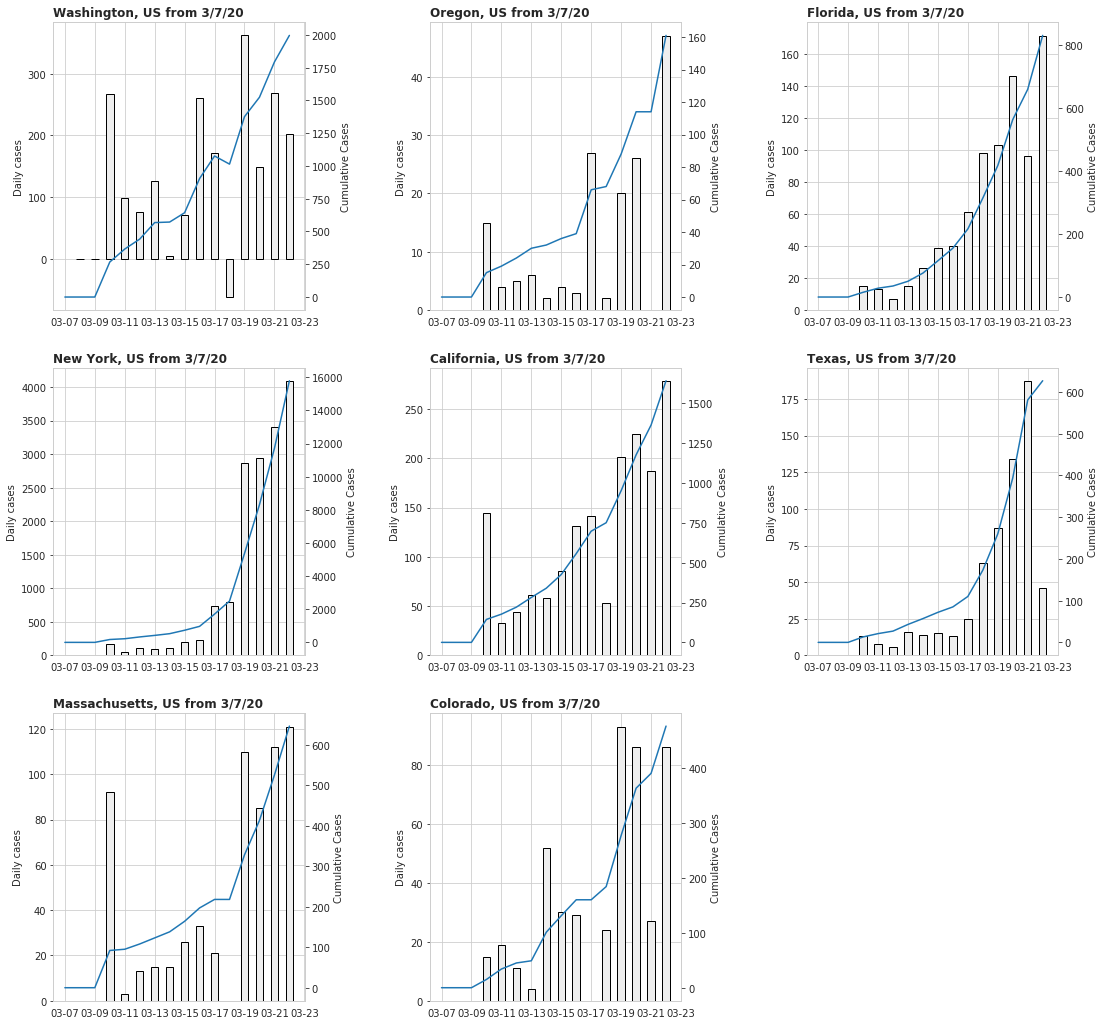

In [ ]:
generate_plots(regions, 3)
plt.show()